Imagen cargada correctamente.


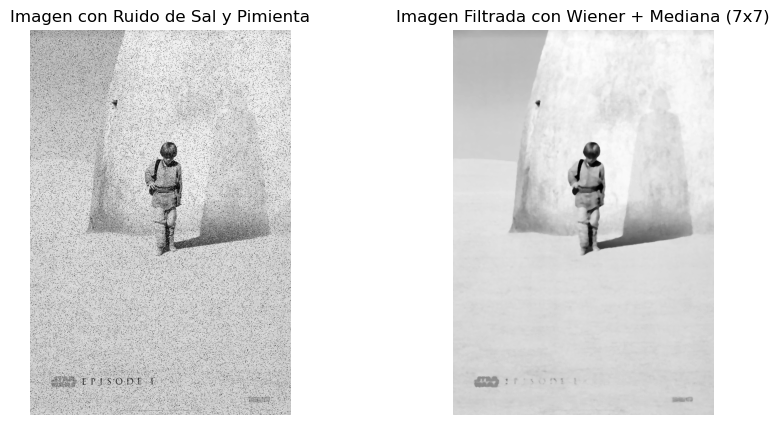

True

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Función para agregar ruido de sal y pimienta
def agregar_ruido_sal_pimienta(imagen, porcentaje_ruido):
    imagen_ruido = imagen.copy()
    num_pixeles = int(porcentaje_ruido * imagen.size)
    indices_salto = np.random.randint(0, imagen.size, num_pixeles)
    imagen_ruido[indices_salto // imagen.shape[1], indices_salto % imagen.shape[1]] = 255  # Píxel blanco
    indices_pimienta = np.random.randint(0, imagen.size, num_pixeles)
    imagen_ruido[indices_pimienta // imagen.shape[1], indices_pimienta % imagen.shape[1]] = 0  # Píxel negro
    return imagen_ruido

# Cargar la imagen original
imagen_original = cv2.imread('Photo Storage.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen fue cargada correctamente
if imagen_original is None:
    print("Error al cargar la imagen.")
else:
    print("Imagen cargada correctamente.")

# Agregar ruido de sal y pimienta
imagen_con_ruido = agregar_ruido_sal_pimienta(imagen_original, 0.05)  # 5% de ruido

# Mostrar la imagen con ruido
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_con_ruido, cmap='gray')
plt.title('Imagen con Ruido de Sal y Pimienta')
plt.axis('off')

# Filtro de Wiener mejorado
def wiener_filter(imagen, kernel_size=5, noise_var=0.2):
    # Crear un kernel de suavizado
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    
    # Filtrar la imagen con el kernel
    imagen_filtrada = convolve2d(imagen, kernel, mode='same', boundary='wrap')

    # Calcular el error de la imagen original y la filtrada
    error = imagen - imagen_filtrada
    # Calcular la estimación del ruido (varianza)
    ruido = np.var(error)

    # Calcular el filtro de Wiener con la varianza estimada
    imagen_wiener = imagen_filtrada + (ruido / (ruido + noise_var)) * (imagen - imagen_filtrada)
    
    return imagen_wiener

# Aplicar el filtro de Wiener con mayor tamaño de kernel
imagen_filtrada_wiener = wiener_filter(imagen_con_ruido, kernel_size=7, noise_var=0.3)

# Aplicar un filtro de mediana más grande para reforzar
imagen_filtrada_mediana = cv2.medianBlur(np.uint8(imagen_filtrada_wiener), 7)  # Filtro de mediana 7x7

# Mostrar la imagen filtrada con Wiener + Mediana
plt.subplot(1, 2, 2)
plt.imshow(imagen_filtrada_mediana, cmap='gray')
plt.title('Imagen Filtrada con Wiener + Mediana (7x7)')
plt.axis('off')

plt.show()

# Guardar las imágenes
cv2.imwrite('imagen_con_ruido.jpg', imagen_con_ruido)
cv2.imwrite('imagen_filtrada_mejorada.jpg', imagen_filtrada_mediana)
